# MNIST softmax regression

This notebook shows the basic steps in developing an equivalent "hello world" for machinelearning. The purpose here is to develop a model that will recognize handwritten digits (ie, 0 through 9). It's based on the regular Tensorflow tutorial ["MNIST For ML Beginners"](https://www.tensorflow.org/get_started/mnist/beginners).

In [1]:
%matplotlib inline
import os
import numpy as np
import tensorflow as tf
from IPython.display import display, Image
from plotting import show, show_images
from tensorflow.examples.tutorials.mnist import input_data

Defines the path where the MNIST dataset can be found.

In [2]:
mnist_path = '/mnt/c/src/tf-playground/mnist'
# read data
mnist = input_data.read_data_sets(mnist_path, one_hot=True)

Extracting /mnt/c/src/tf-playground/mnist/train-images-idx3-ubyte.gz
Extracting /mnt/c/src/tf-playground/mnist/train-labels-idx1-ubyte.gz
Extracting /mnt/c/src/tf-playground/mnist/t10k-images-idx3-ubyte.gz
Extracting /mnt/c/src/tf-playground/mnist/t10k-labels-idx1-ubyte.gz


Supress TensorFlow hardware warnings (SSE4 support, etc)

In [3]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

Defines the placeholders and variables required

- `X` is a placeholder for the actual image data. By using `None` as the height dimension, Tensorflow is told that the height may variable (so `X` can be sized to include any number of images, in a batching style). Note that each row is a complete image, simply flattened out (27 * 27 = 784)
- `W` and `b` defines the weights and biases used by the model itself
- `Y` and `Y_` refers to our guesses and labels (correct guess value) respectively

In [4]:
X = tf.placeholder(tf.float32, [None, 784], 'X')
W = tf.Variable(tf.zeros([784, 10]), 'W')
b = tf.Variable(tf.zeros([10]), 'b')
Y = tf.nn.softmax(tf.matmul(X, W) + b)
Y_ = tf.placeholder(tf.float32, [None, 10], 'Y_')

- `cross_entropy` is a tensor that gives a measurement of how well we guessed correctly
- `train_step` is a operation that Tensorflow defines which seeks to mimize the `cross_entropy` tensor

In [5]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=Y_, logits=Y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)
sess = tf.InteractiveSession()
init = tf.global_variables_initializer().run()


In [6]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    step_v, cross_entropy_v = sess.run([train_step, cross_entropy], feed_dict={X: batch_xs, Y_: batch_ys})
    if (_ % 50 == 0):
        print('{0}'.format(cross_entropy_v))

2.30258536339
1.89937257767
1.70191919804
1.72313785553
1.75903964043
1.69786894321
1.65360569954
1.6133402586
1.59444463253
1.5962600708
1.63095402718
1.65190947056
1.5941131115
1.61394655704
1.61885797977
1.6287317276
1.51290023327
1.62334275246
1.55136501789
1.63191604614


Now the model has been trained, and we verify the accuracy of the resultant weights and biases.

In [7]:
# check accuracy against test set
correct_prediction = tf.equal(tf.argmax(Y, 1), tf.argmax(Y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
sess.run(accuracy, feed_dict={X: mnist.test.images, Y_: mnist.test.labels})

0.90789998

Visualize weights, giving a straightforward interpretation of how the model is the way it is.

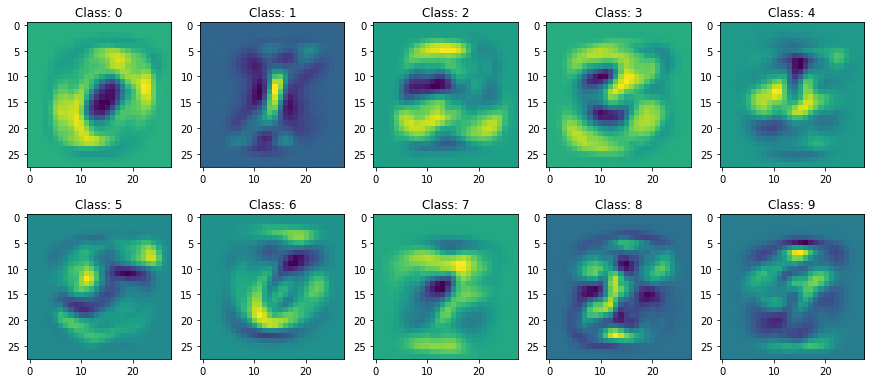

In [8]:
# gets actual weights
We = W.eval()
# split by columns, then reshape columns to 28x28
Wec = [np.reshape(x, (28, 28)) for x in np.hsplit(We, 10)]
show_images(Wec, 2, ['Class: {}'.format(n) for n in range(10)])